In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [84]:
loan_df = pd.read_csv("loan.csv")

In [85]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [86]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [87]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


#### WE Could see many NaN in certain columns and rows

In [88]:
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [89]:
loan_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

#### data types are of float, int and object

In [90]:
#To find the count under each column for NaN values
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [91]:
#To find the percentage of NaN values in the data set and express in the table
null = loan_df.isnull().sum()
mean = loan_df.isnull().mean()
table = pd.concat([null,(mean * 100)],axis=1)
table.rename(columns = {0:'Count',1:'Percentage'},inplace=True)
table

,Count,Percentage
id,0,0.000000
member_id,0,0.000000
loan_amnt,0,0.000000
funded_amnt,0,0.000000
funded_amnt_inv,0,0.000000
...,...,...
tax_liens,39,0.098195
tot_hi_cred_lim,39717,100.000000
total_bal_ex_mort,39717,100.000000
total_bc_limit,39717,100.000000


In [92]:
# The columns that have more than 40% of NaN are listed below.
max_percent = table[table['Percentage']>40]
max_percent

,Count,Percentage
mths_since_last_delinq,25682,64.662487
mths_since_last_record,36931,92.985372
next_pymnt_d,38577,97.129693
mths_since_last_major_derog,39717,100.000000
annual_inc_joint,39717,100.000000
dti_joint,39717,100.000000
verification_status_joint,39717,100.000000
tot_coll_amt,39717,100.000000
tot_cur_bal,39717,100.000000
open_acc_6m,39717,100.000000


In [93]:
max_percent.info()
# we find 57 columns having NAN values

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, mths_since_last_delinq to total_il_high_credit_limit
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Count       57 non-null     int64  
 1   Percentage  57 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.3+ KB


In [94]:
# drop all the 57 columns which contain 100% NaN data
loan_df.dropna(axis=1,how='all',inplace=True)
round((100*loan_df.isnull().sum())/len(loan_df.index))

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [96]:
# on execution, we notice that 57 columns having higher (100%) NaN vlaues are dropped
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [97]:
# we still find couple more columns that have NAN data, lets delete them now.
loan_df.drop(labels = ['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)

In [98]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [99]:
# to check rows that contain 100% empty data
round((100*loan_df.isnull().sum(axis=1))/len(loan_df.index))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Length: 39717, dtype: float64

In [100]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [101]:
# to check the unique target values - based on loan status
loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [102]:
# Drop the 'Current' loan status from loan_status, because the company has already sactioned loan to them.
loan_status_list = ['Fully Paid','Charged Off']
loan_df=loan_df[loan_df['loan_status'].isin(loan_status_list)]
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [103]:
#Converting loan status data into numerical data
loan_df['loan_status']=loan_df['loan_status'].map({'Fully Paid':0,'Charged Off':1})
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [104]:
#Extract necessary columns
loan_df=loan_df.loc[:,('loan_amnt','term','int_rate','grade','emp_length','home_ownership','annual_inc','issue_d','loan_status','purpose','addr_state','dti')]
loan_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20


In [105]:
# Create a new columns knowns as year from the existing columns
loan_df['year'] = loan_df['issue_d'].apply(lambda x:x.split('-')[1])
loan_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65,11
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72,11
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00,11
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20,11


In [112]:
# convert the data type from string to integer
loan_df['year']=loan_df['year'].astype(int)
type(loan_df['year'][0])

numpy.int32

### Univariate Analysis

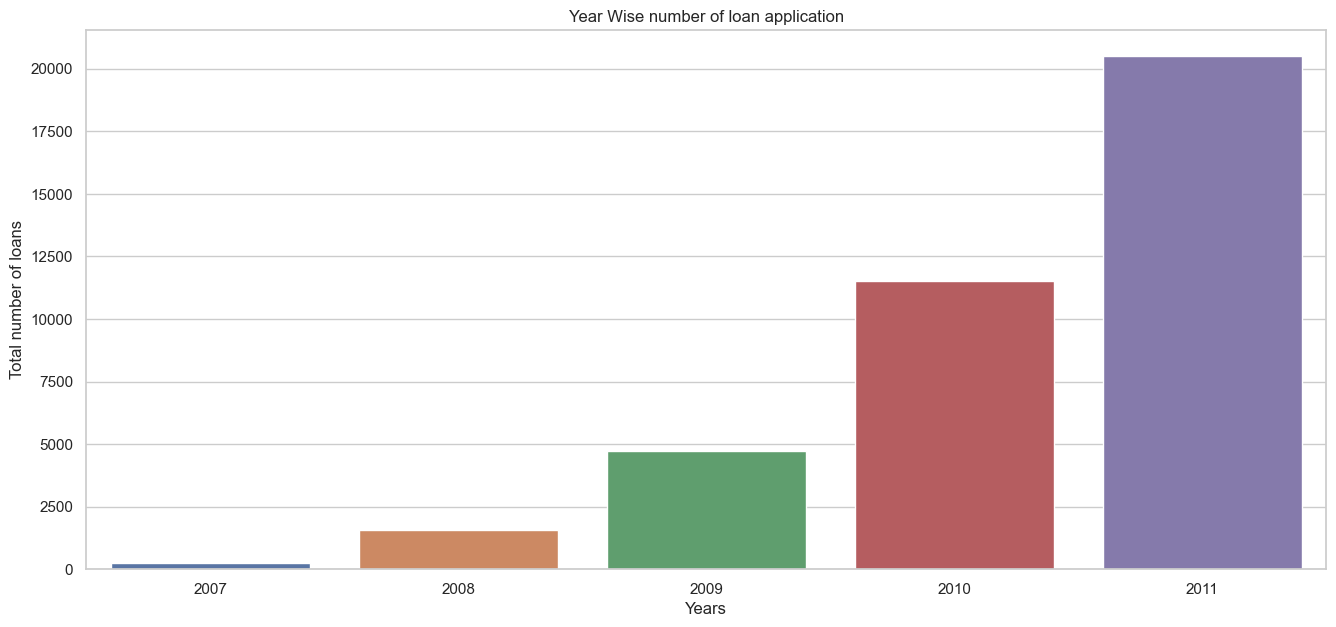

In [117]:
# draw the counterplot to show the year wise loan sanction amount from lending club
plt.figure(figsize =(16,7))
sb.set(style="whitegrid")
ax = sb.countplot(x='year',data=loan_df)
years = ['2007','2008','2009','2010','2011']
xpos = np.arange(len(years))
ax.set(xlabel = 'Years', ylabel='Total number of loans',title='Year Wise number of loan application')
plt.xticks(xpos,years)
plt.show()

In [119]:
loan_df['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [125]:
# remove the "%" and convert the column to float
loan_df['int_rate'] = loan_df['int_rate'].replace("%","")
loan_df['int_rate'] = loan_df['int_rate'].astype(float)
type(loan_df['int_rate'][0])

numpy.float64

In [126]:
loan_df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [127]:
# create a new column from the existing column
loan_df['month'] = loan_df['issue_d'].apply(lambda x:x.split('-')[0])
loan_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year,month
0,5000,36 months,10.65,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65,11,Dec
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11,Dec
2,2400,36 months,15.96,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72,11,Dec
3,10000,36 months,13.49,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00,11,Dec
5,5000,36 months,7.90,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20,11,Dec


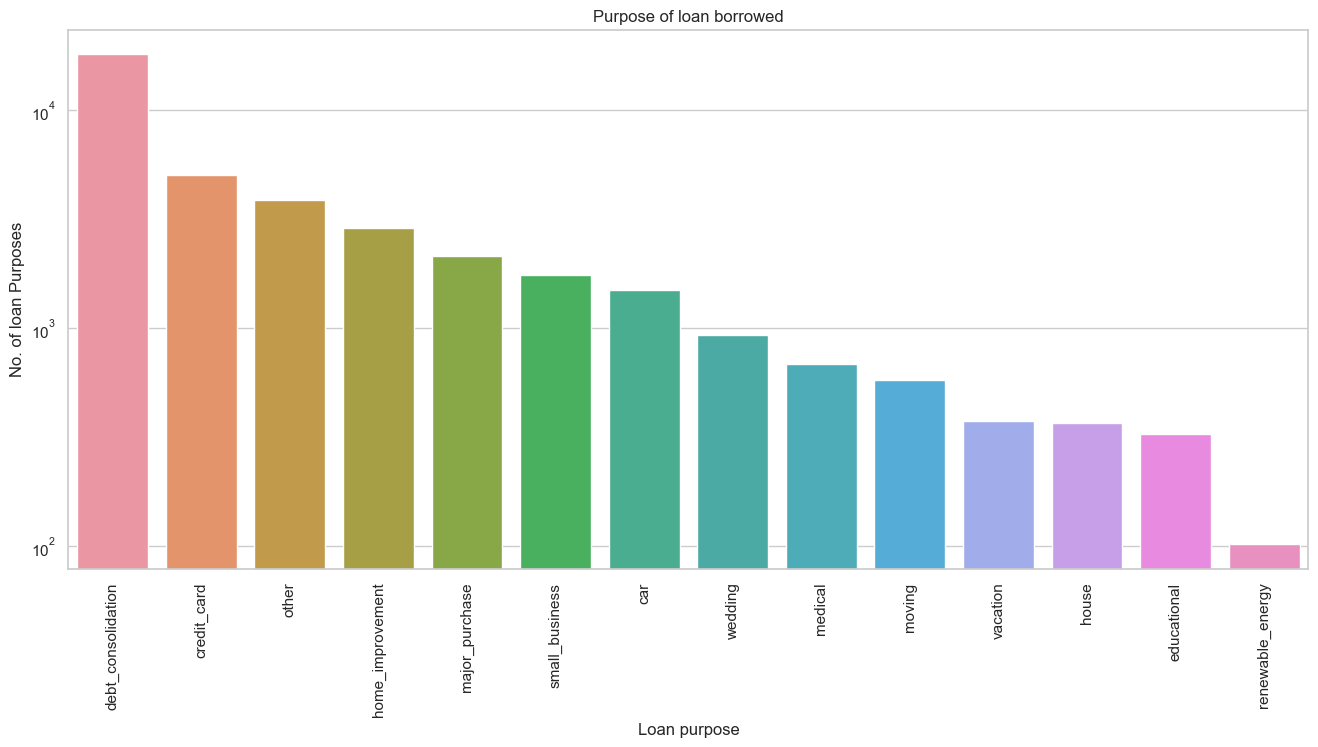

In [130]:
# count plot to show the different loan purpose from the lending club
plt.figure(figsize=(16,7))
ax = sb.countplot(x='purpose',data=loan_df,order=loan_df['purpose'].value_counts().index)
ax.set(xlabel='Loan purpose', ylabel='No. of loan Purposes',title='Purpose of loan borrowed')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

observation: 
Highest number of loans are taken for debt_consolidation, followed by credit card, other, home_improvemnt and so on.

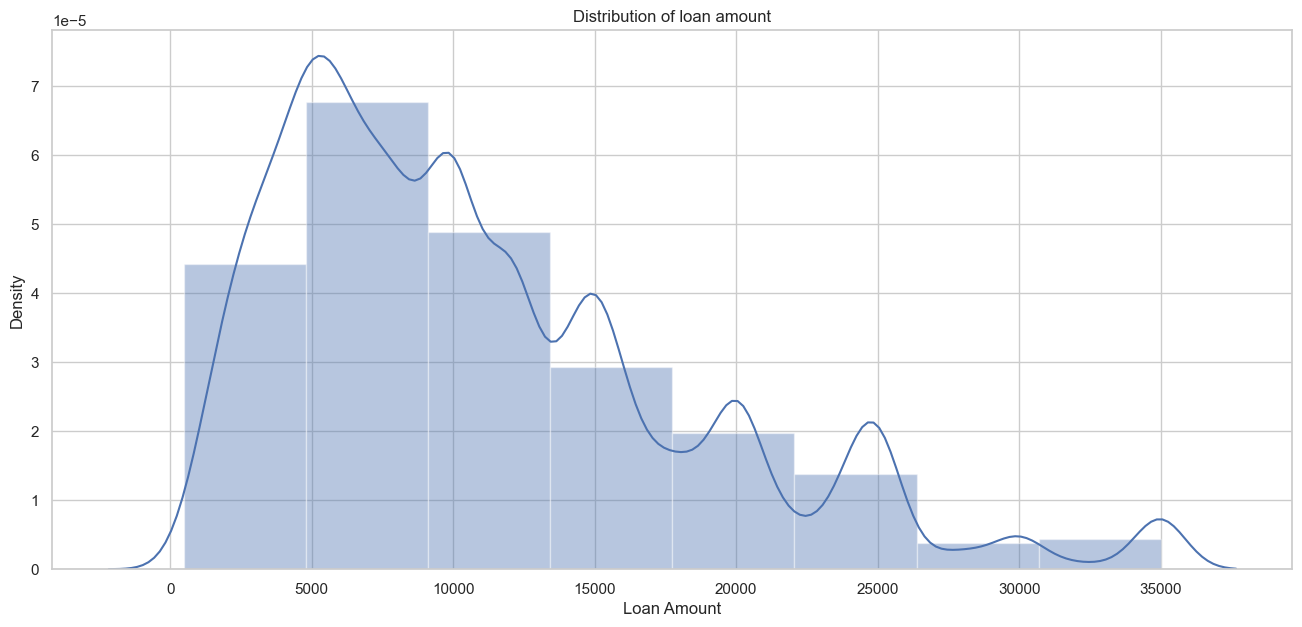

In [139]:
# lets look at the loan amount borrowed from - amount slab
plt.figure(figsize=(16,7))
ax=sb.distplot(loan_df['loan_amnt'],bins=8,color='b')
ax.set(xlabel='Loan Amount',title='Distribution of loan amount')
plt.show()

Observation : the loan ranging from 5000$ to 10000$ is maximum.

#### Bivariate Analysis


In [142]:
#create a separate dataframe of defaulters from the initial dataframe loan_df for Charged Off customers
defaulters_df=loan_df.loc[loan_df['loan_status']==1]
defaulters_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year,month
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11,Dec
8,5600,60 months,21.28,F,4 years,OWN,40000.0,Dec-11,1,small_business,CA,5.55,11,Dec
9,5375,60 months,12.69,B,< 1 year,RENT,15000.0,Dec-11,1,other,TX,18.08,11,Dec
12,9000,36 months,13.49,C,< 1 year,RENT,30000.0,Dec-11,1,debt_consolidation,VA,10.08,11,Dec
14,10000,36 months,10.65,B,3 years,RENT,100000.0,Dec-11,1,other,CA,7.06,11,Dec


In [143]:
#calculate the percentage of loan defaulters according to grade
grade_df=pd.DataFrame(data=round((100*defaulters_df['grade'].value_counts())/loan_df['grade'].value_counts(),2))
grade_df.rename(columns={'grade':'defaulter_perc'},inplace=True)
grade_df

,defaulter_perc
A,5.99
B,12.21
C,17.19
D,21.99
E,26.85
F,32.68
G,33.78


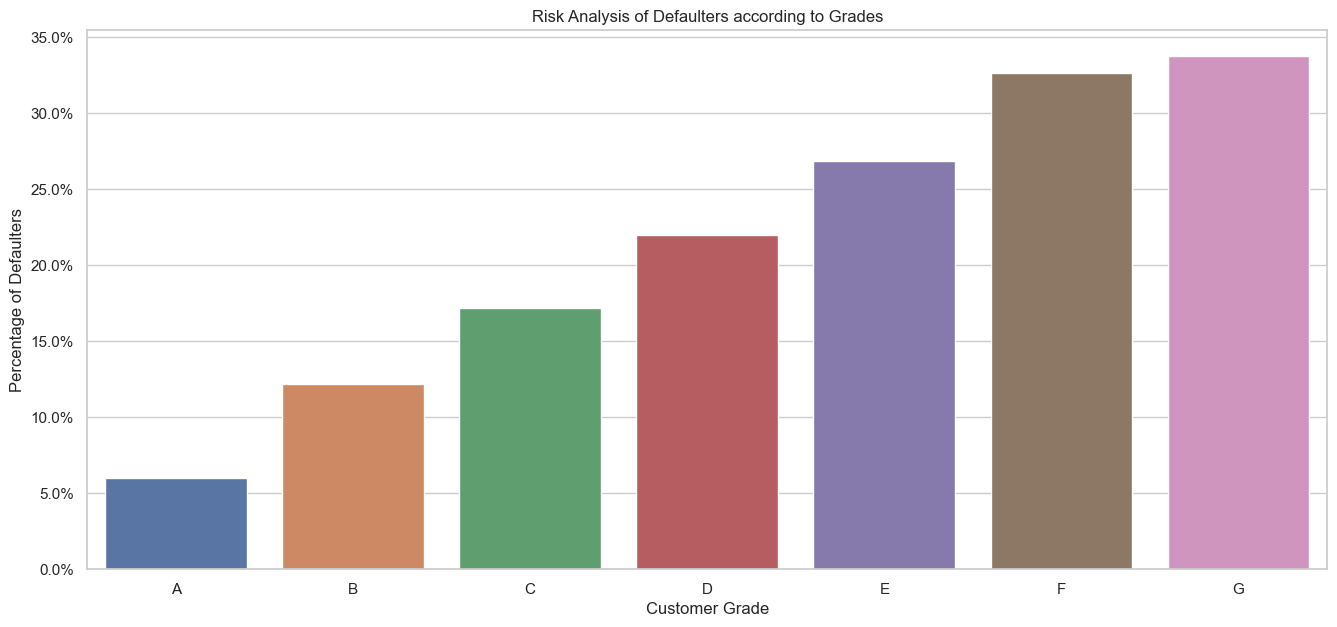

In [145]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=grade_df.index,y='defaulter_perc',data=grade_df)
ax.set(xlabel='Customer Grade', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters according to Grades')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Obsercation: Grade 'G' has highest number of defaulters with 33.78%. The defaulter percentage increases alphabaticlay starting from A to G

In [154]:
#calculate the loan defaulters percentage according to loan purpose
purpose_df=pd.DataFrame(data=round((100*defaulters_df['purpose'].value_counts())/loan_df['purpose'].value_counts(),1))
purpose_df.rename(columns={'purpose':'defaulter_perc'},inplace=True)
purpose_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
purpose_df

,defaulter_perc
small_business,27.1
renewable_energy,18.6
educational,17.2
other,16.4
house,16.1
moving,16.0
medical,15.6
debt_consolidation,15.3
vacation,14.1
home_improvement,12.1


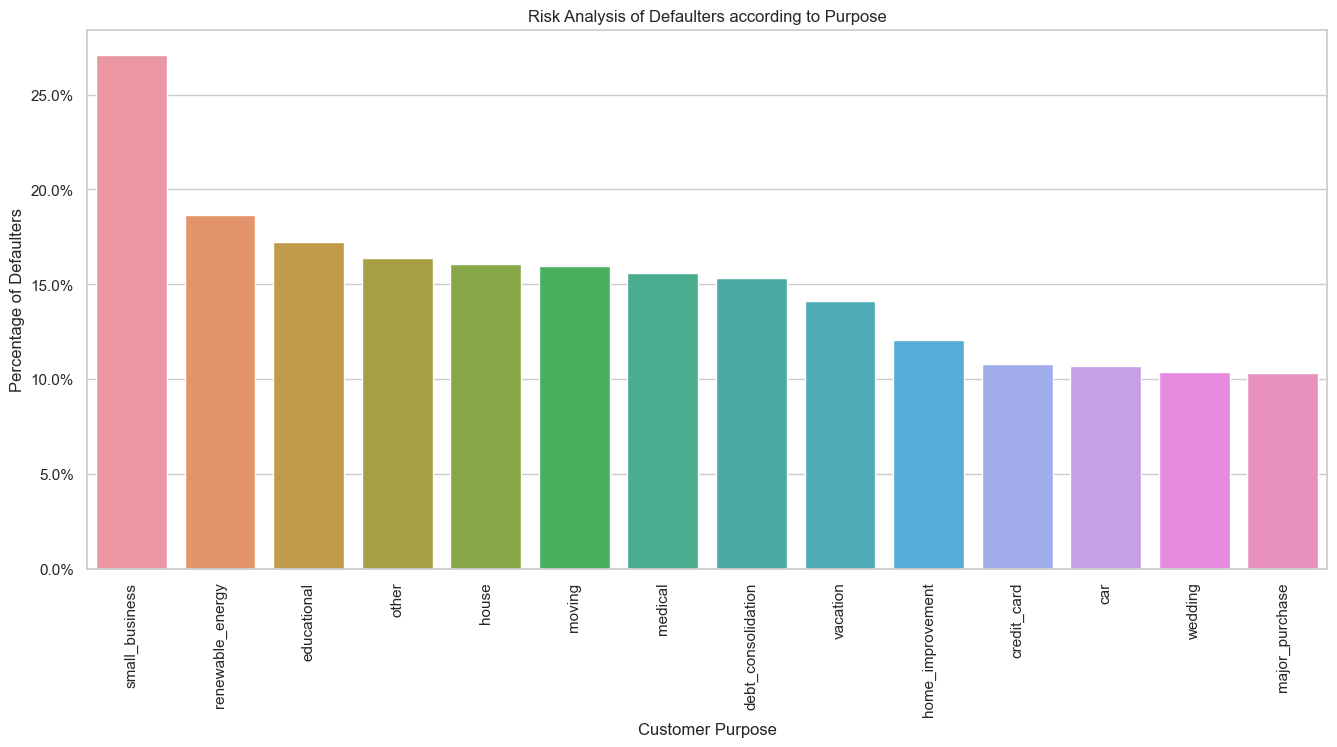

In [148]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=purpose_df.index,y='defaulter_perc',data=purpose_df)
ax.set(xlabel='Customer Purpose', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters according to Purpose')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

Customer who opt loan for "small business" often exhibit high risk with 27.08%, followed by "renewable energy", 'eduction", "other" and so on.

In [155]:
#calculate the percentage of loan defaulters according to Employee experience
emp_df=pd.DataFrame(data=round((100*defaulters_df['emp_length'].value_counts())/loan_df['emp_length'].value_counts(),1))
emp_df.rename(columns={'emp_length':'defaulter_perc'},inplace=True)
emp_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
emp_df

,defaulter_perc
10+ years,15.7
7 years,15.4
1 year,14.4
5 years,14.3
< 1 year,14.2
6 years,14.2
8 years,14.1
3 years,13.8
4 years,13.8
2 years,13.2


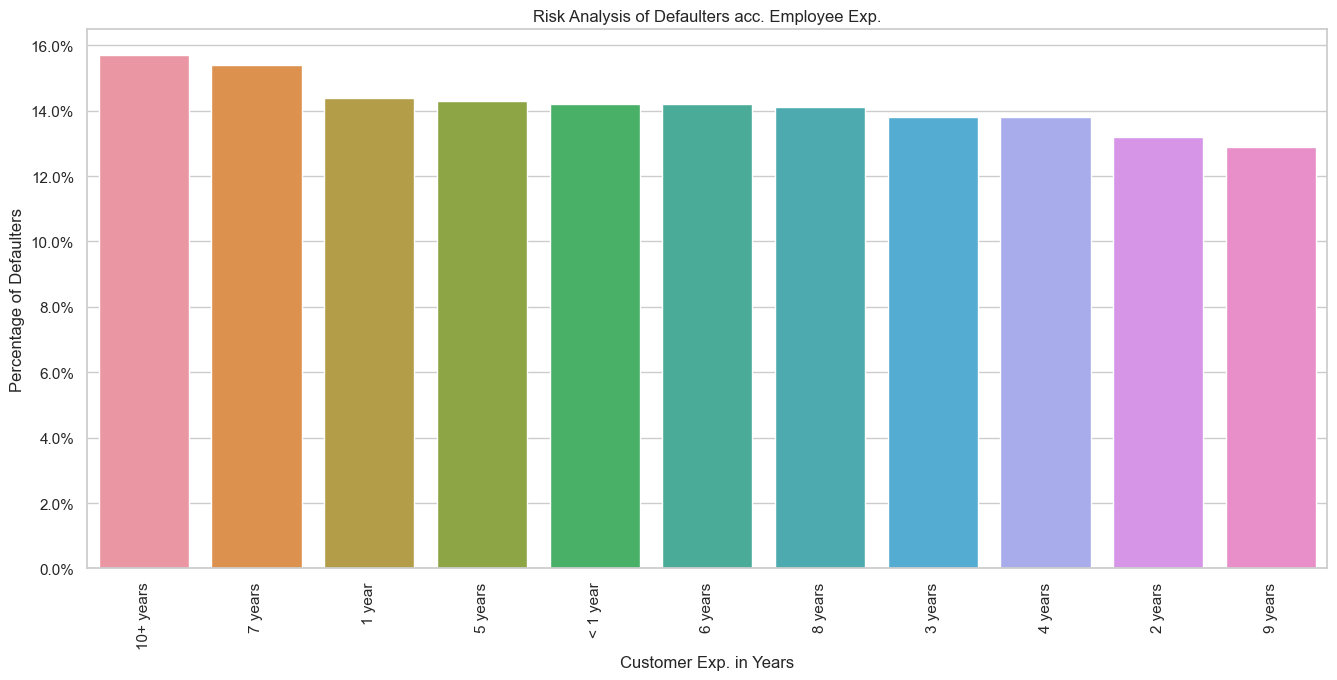

In [156]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=emp_df.index,y='defaulter_perc',data=emp_df)
ax.set(xlabel='Customer Exp. in Years', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters according to Employee Exp.')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

Obseration: Employees with employee experience of 10+ year often have higher percentage of defaulting. 

In [157]:
#calculate the percentage of loan defaulters according to home onwership
home_df=pd.DataFrame(data=round((100*defaulters_df['home_ownership'].value_counts())/loan_df['home_ownership'].value_counts(),2))
home_df.rename(columns={'home_ownership':'defaulter_perc'},inplace=True)
home_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
home_df.dropna(inplace=True)
home_df

,defaulter_perc
OTHER,18.37
RENT,15.36
OWN,14.89
MORTGAGE,13.67


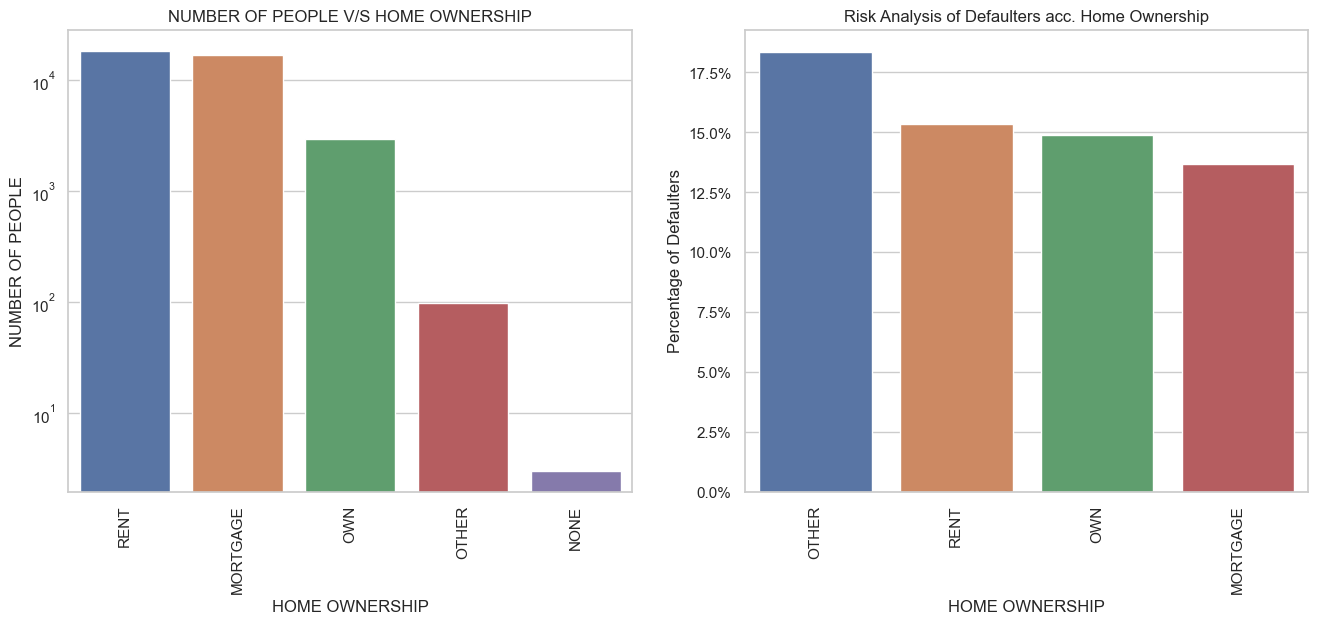

In [161]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
ax = sb.countplot(x='home_ownership',data=loan_df,order=loan_df['home_ownership'].value_counts().index)
ax.set(xlabel='HOME OWNERSHIP', ylabel='NUMBER OF PEOPLE',title='NUMBER OF PEOPLE V/S HOME OWNERSHIP')
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(1, 2, 2)
#plt.pie(home_df['defaulter_perc'], labels = home_df.index,autopct='%.2f%%')
ax=sb.barplot(x=home_df.index,y='defaulter_perc',data=home_df)
ax.set(xlabel='HOME OWNERSHIP', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Home Ownership')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

Observation: More applications are from the people who stay in 'rent'. The precentage of defaulters is maximum under the section "other", followed by "rent", 'own' and 'mortage'

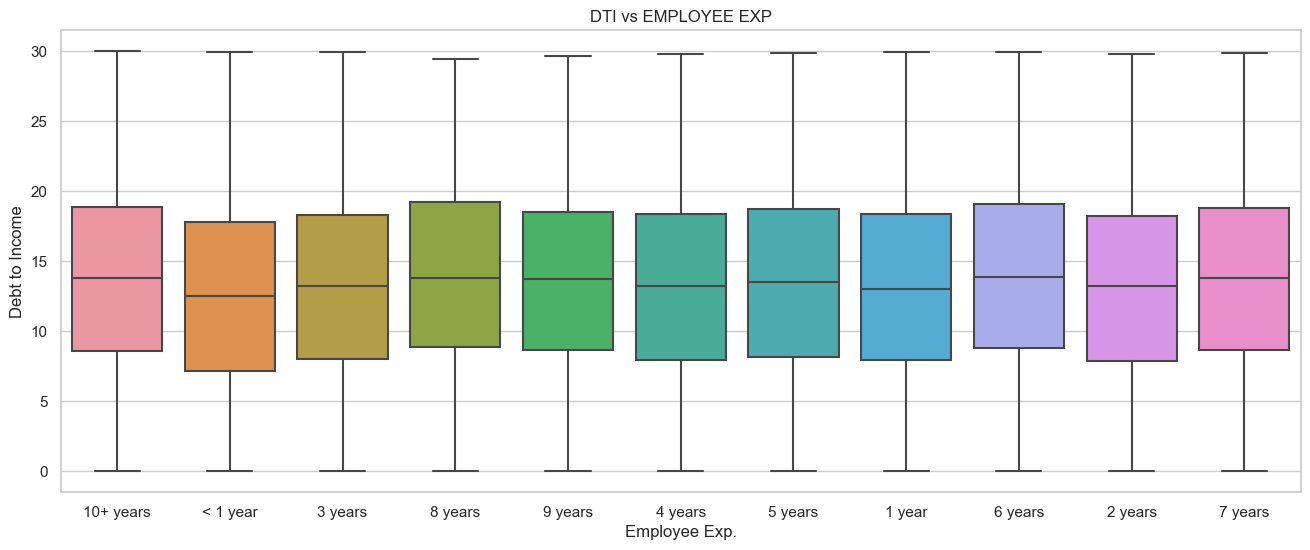

In [162]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='emp_length',y='dti',data=loan_df)
ax.set(xlabel='Employee Exp.', ylabel='Debt to Income',title='DTI vs EMPLOYEE EXP')
plt.show()

Observation: Dept to income is noticed more for 10+ years of work experience

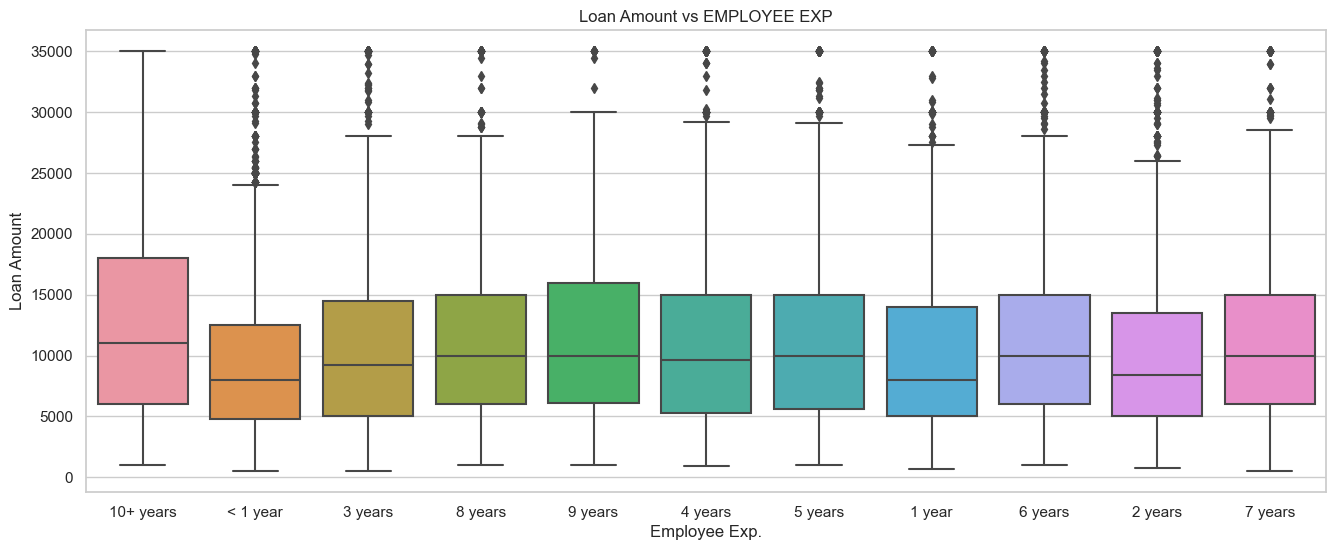

In [163]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='emp_length',y='loan_amnt',data=loan_df)
ax.set(xlabel='Employee Exp.', ylabel='Loan Amount',title='Loan Amount vs EMPLOYEE EXP')
plt.show()

Observation: From the graph, it is evident that the work group of 10+ years of experience go for larger loan amount.

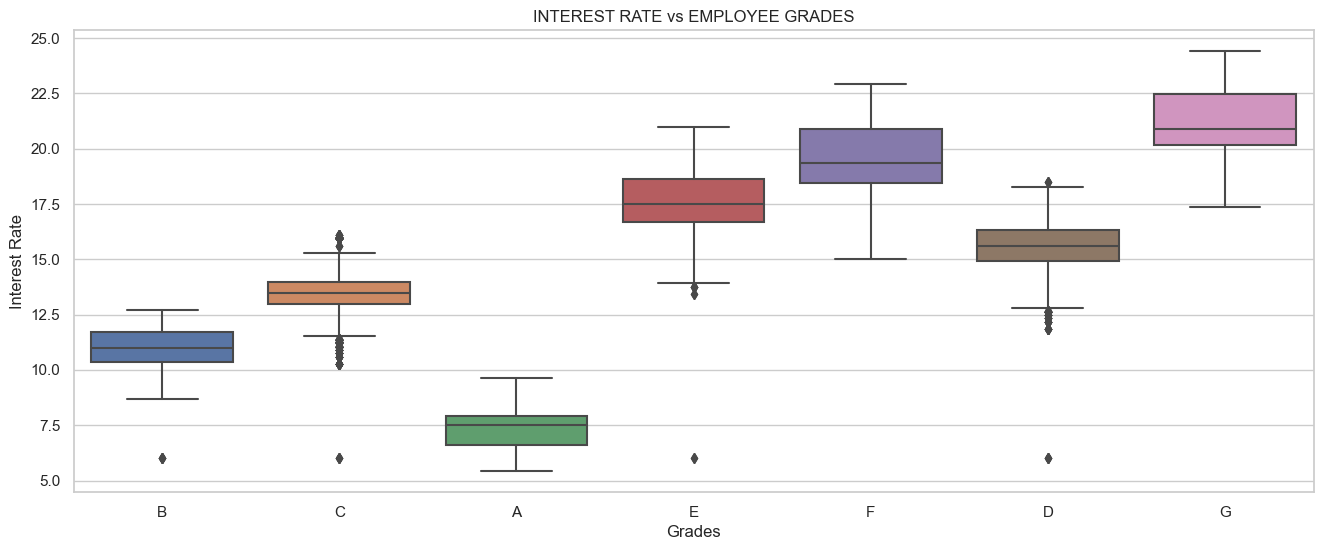

In [171]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='grade',y='int_rate',data=loan_df,)
ax.set(xlabel='Grades', ylabel='Interest Rate',title='INTEREST RATE vs EMPLOYEE GRADES')
plt.show()

Observation: Grade "G" has highest inerest rate. Grade 'A' has lowest interest rate.

In [178]:
grade_group = loan_df.groupby('grade')
grade_group['int_rate'].median()

grade
A     7.49
B    10.99
C    13.49
D    15.62
E    17.51
F    19.36
G    20.90
Name: int_rate, dtype: float64

In [180]:
emp_group = loan_df.groupby('emp_length')
emp_group['loan_amnt'].median()

emp_length
1 year        8000.0
10+ years    11000.0
2 years       8400.0
3 years       9225.0
4 years       9600.0
5 years      10000.0
6 years      10000.0
7 years      10000.0
8 years      10000.0
9 years      10000.0
< 1 year      8000.0
Name: loan_amnt, dtype: float64

In [181]:
#calculate the percentage of loan defaulters according to address of a state
state_df=pd.DataFrame(data=round((100*defaulters_df['addr_state'].value_counts())/loan_df['addr_state'].value_counts(),2))
state_df.rename(columns={'addr_state':'defaulter_perc'},inplace=True)
state_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
state_df=state_df.head(10)
state_df

,defaulter_perc
NE,60.00
NV,22.55
SD,19.35
AK,19.23
FL,18.12
MO,17.01
HI,16.87
ID,16.67
NM,16.39
OR,16.32


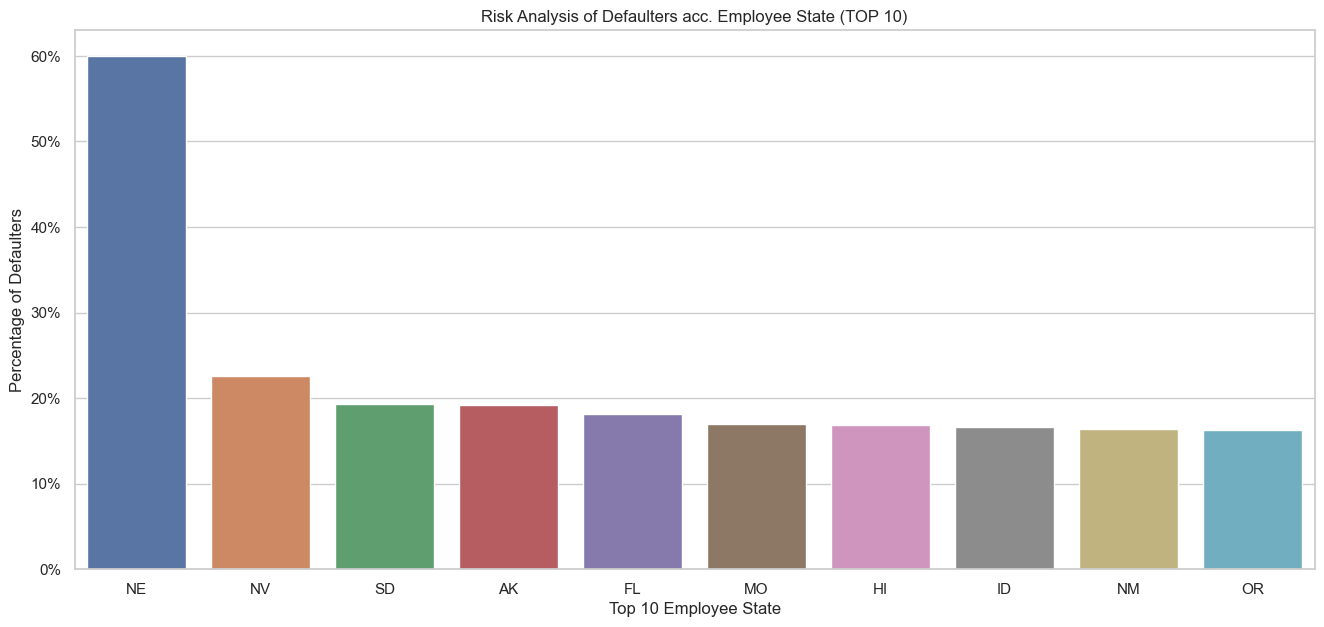

In [182]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=state_df.index,y='defaulter_perc',data=state_df)
ax.set(xlabel='Top 10 Employee State', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Employee State (TOP 10)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Observation: State NE has highest defaulter with 60%

In [183]:
#calculate the percentage of loan defaulters according to term
term_df=pd.DataFrame(data=round((100*defaulters_df['term'].value_counts())/loan_df['term'].value_counts(),2))
term_df.rename(columns={'term':'defaulter_perc'},inplace=True)
term_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
term_df

,defaulter_perc
60 months,25.31
36 months,11.09


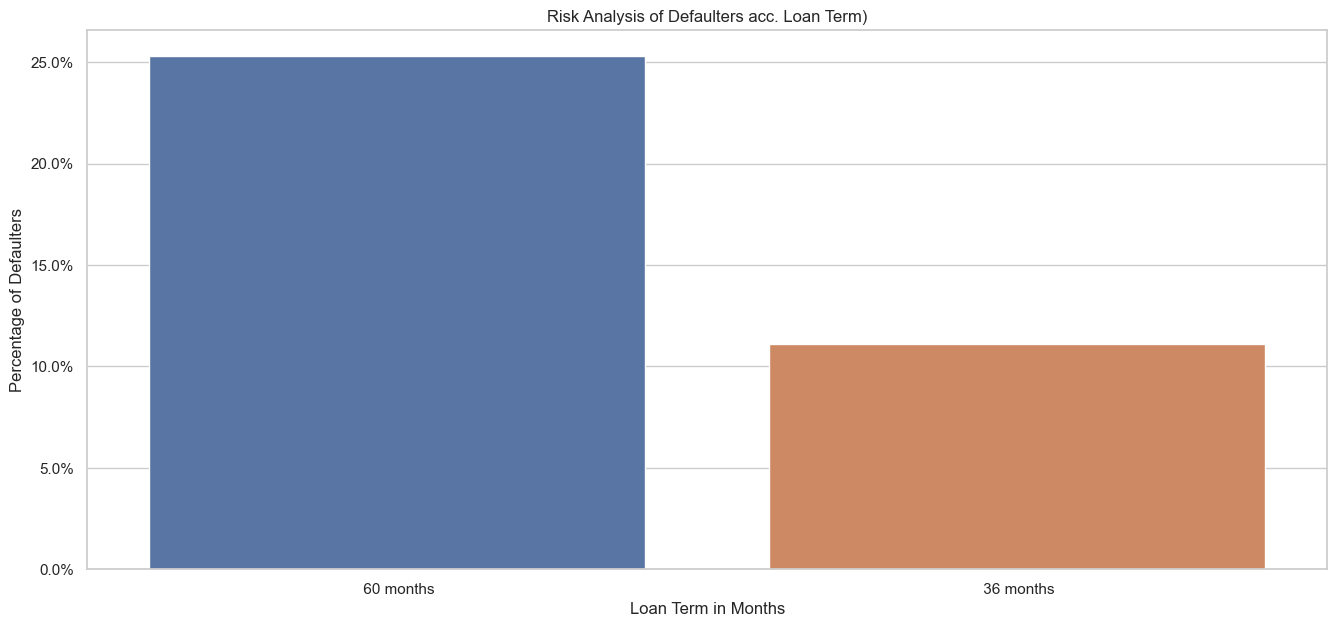

In [184]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=term_df.index,y='defaulter_perc',data=term_df)
ax.set(xlabel='Loan Term in Months', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Loan Term)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Observation: Highest defauleters are noticed for 60 months time period.